In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#%timeit ,  line_profiler, memory_profiler

In [10]:
import nltk
from nltk import pos_tag, word_tokenize
from nltk.collocations import *
import re

In [2]:
#polar = pd.read_csv('AFINN-111.txt', sep="\t", header=None)
polar = pd.read_csv('data/senticon_es.csv')
polar.head()#.columns = ["polaritat", "valor"]

,level,orient,lemma,pos,pol,std
0,1,positive,acertado,a,0.708,0.149
1,1,positive,admirable,a,0.906,0.125
2,1,positive,admiración,n,0.450,0.331
3,1,positive,admirar,v,0.750,0.177
4,1,positive,afectivo,a,0.375,0.000


In [73]:
GEN = pd.read_csv('data/1_GEN_clean.csv')
GEN.head()
REV = pd.read_csv('data/66_REV_clean.csv')
REV.head()

,book,chapter,verse,text,version
0,GEN,1,1,"Dios, en el principio, creó los cielos y la ti...",NVI
1,GEN,1,2,"La tierra era un caos total, las tinieblas cub...",NVI
2,GEN,1,3,Y dijo Dios: «¡ Que exista la luz ! »Y la luz ...,NVI
3,GEN,1,4,Dios consideró que la luz era buena y la separ...,NVI
4,GEN,1,5,"A la luz la llamó «día», y a las tinieblas, «n...",NVI


,book,chapter,verse,text,version
0,REV,1,1,"Esta es la revelación de Jesucristo, que Dios ...",NVI
1,REV,1,2,"quien por su parte da fe de la verdad, escribi...",NVI
2,REV,1,3,Dichoso el que lee y dichosos los que escuchan...,NVI
3,REV,1,4,"Yo, Juan, escribo a las siete iglesias que est...",NVI
4,REV,1,5,"y de parte de Jesucristo, el testigo fiel, el ...",NVI


In [75]:
list_gen = GEN.text.to_list()
list_rev = REV.text.to_list()

In [76]:
list_gen[:2]
list_rev[:2]

['Dios, en el principio, creó los cielos y la tierra.',
 'La tierra era un caos total, las tinieblas cubrían el abismo, y el Espíritu de Dios se movía sobre la superficie de las aguas.']

['Esta es la revelación de Jesucristo, que Dios le dio para mostrar a sus siervos lo que sin demora tiene que suceder. Jesucristo envió a su ángel para dar a conocer la revelación a su siervo Juan, ',
 'quien por su parte da fe de la verdad, escribiendo todo lo que vio, a saber, la palabra de Dios y el testimonio de Jesucristo. ']

In [100]:
def candidates(list_sentences):
    sh_tag = [ tag_tokenizer(line) for line in(list_sentences)]
    sh_np = [t for t in(sh_tag)]
    sh_words = to_words(sh_np)
    return sh_words

In [37]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

def get_tokens(text):
    # aquest tokenizer extreurà els caracters de puntuació
    return tokenizer.tokenize(text.lower())

def token_filter(tokens):
    stop_words = nltk.corpus.stopwords.words('spanish')
    word_tokens = [word for word in tokens if word not in stop_words and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}',word)]
    return word_tokens

def tag_tokenizer(text):
    tokens = get_tokens(text)
    tokens = token_filter(tokens)
    tagged_tokens = tagged_pos(tokens)
    return tagged_tokens

def tagged_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)
    return tagged_tokens

In [108]:
def to_words(data_list):
    ret=[]
    for line in(data_list):
        med=[]
        for w in line:
            #print(w)
            tx=''
            for el in w:
                if type(el) is tuple:
                    tx += " "+el[0]
                else:
                    tx=w[0]
            tx = tx.strip()
            med.append(tx)
        if len(med)>0:
               ret.append(med)
    return ret

In [109]:
t1 = tag_tokenizer(list_gen[0])
t1

[('dios', 'NNS'),
 ('principio', 'VBP'),
 ('creó', 'JJ'),
 ('cielos', 'NN'),
 ('tierra', 'NN')]

In [110]:
cand_gen = candidates(list_gen)

In [111]:
len(list_rev)

cand_rev = candidates(list_rev)

len(cand_rev)

382

382

In [112]:
cand_gen[:2]
cand_rev[:2]

[['dios', 'principio', 'creó', 'cielos', 'tierra'],
 ['tierra',
  'caos',
  'total',
  'tinieblas',
  'cubrían',
  'abismo',
  'espíritu',
  'dios',
  'movía',
  'superficie',
  'aguas']]

[['revelación',
  'jesucristo',
  'dios',
  'dio',
  'mostrar',
  'siervos',
  'demora',
  'suceder',
  'jesucristo',
  'envió',
  'dar',
  'conocer',
  'revelación',
  'siervo',
  'juan'],
 ['parte',
  'verdad',
  'escribiendo',
  'vio',
  'saber',
  'palabra',
  'dios',
  'testimonio',
  'jesucristo']]

In [113]:
def calculate_mean_opinions(polar, candidats):
    ret=[]
    diccio = dict(zip(polar.lemma, polar.pol))
    for i,text in enumerate(candidats):
        mitj = 0
        val = 0
        count_opinion = 0
        #print('text:'+" ".join(text))
        for j,word in enumerate(text):
            #print(word)
            if diccio.get(word) == None:
                val = 0
                #print('not in dic')
            else: 
                val = diccio.get(word)
                count_opinion += 1
            mitj += val
        #print('m='+str(mitj))
        if count_opinion:
            ret.append ( float(mitj/count_opinion))
        else:
            ret.append(0)
    print('n='+str(i))    
    return ret

In [114]:
opinions_gen = calculate_mean_opinions(polar, cand_gen)

n=1482


In [115]:
len(cand_rev)

382

In [116]:
opinions_rev = calculate_mean_opinions(polar, cand_rev)

n=381


In [117]:
opinions_gen[:5]

[0, -0.25, 0.25, 0, 0]

In [118]:
opinions_rev[:5]

[0, 0.3, -0.3125, 0, 0.2333333333333333]

In [119]:
GEN['opinions']=opinions_gen

In [120]:
GEN.head(2)

,book,chapter,verse,text,version,opinions
0,GEN,1,1,"Dios, en el principio, creó los cielos y la ti...",NVI,0.00
1,GEN,1,2,"La tierra era un caos total, las tinieblas cub...",NVI,-0.25


In [121]:
len(REV)
len(opinions_rev)

382

382

In [122]:
REV['opinions']=opinions_rev

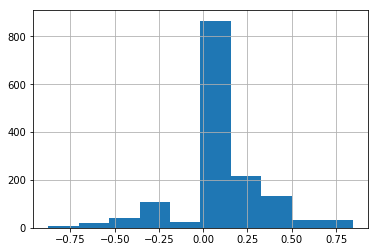

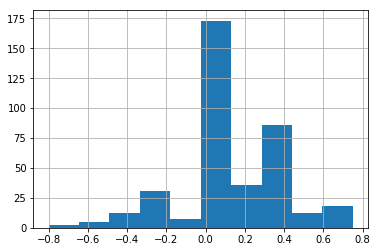

In [128]:
GEN['opinions'].hist();
plt.show();
REV['opinions'].hist();
plt.show();

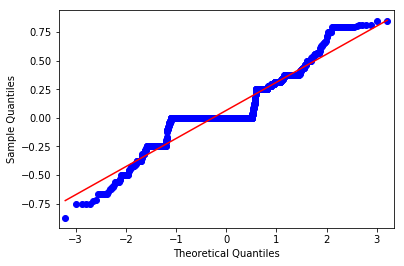

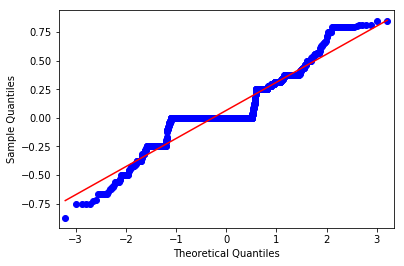

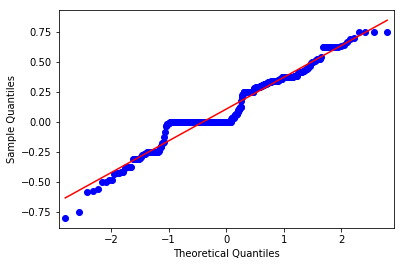

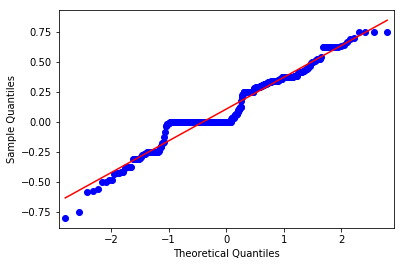

In [133]:
# QQ Plot
from statsmodels.graphics.gofplots import qqplot

# q-q plot
qqplot(GEN['opinions'], line='s')
plt.show()
qqplot(REV['opinions'], line='s')
plt.show()

In [140]:
# Shapiro-Wilk Test
from scipy.stats import shapiro

def test_sh_normality(data, title):
    # normality test
    print(title)
    print('-'*len(title))
    stat, p = shapiro(data)
    print('Statistics=%.4f, p=' % (stat), p)
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    print("")

In [141]:
test_sh_normality(GEN['opinions'],'Genesis')
test_sh_normality(REV['opinions'],'Apocalipsis')

Genesis
-------
Statistics=0.8635, p= 4.6787512879558325e-34
Sample does not look Gaussian (reject H0)

Apocalipsis
-----------
Statistics=0.9442, p= 8.464775408389968e-11
Sample does not look Gaussian (reject H0)



In [157]:
from scipy.stats import levene
stat, p_value = levene(GEN['opinions'], REV['opinions'])
# H0: μ1 = μ2
# The Levene test tests the null hypothesis that all input
# samples are from populations with equal variances. It is more robust than 
# Fischer(needs to be Gaussian) and Barlett
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis that Var(X) == Var(Y), then they are independents')

Statistics=18.200, p=0.000
Reject the null hypothesis that Var(X) == Var(Y), then they are independents


In [142]:

# Student's t-test

from scipy.stats import ttest_ind
# seed the random number generator

# generate two independent samples
data1 = GEN['opinions']
data2 = REV['opinions']
# compare samples
stat, p = ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=-2.787, p=0.005
Different distributions (reject H0)


In [160]:
from scipy.stats import ttest_ind
# t-test ind ependent
# # H0: μ1 >= μ2
# les variances ens diuen que son iguals
alpha2 = 0.025
ttest_ind(data1, data2)#, equal_var=True)
np.std(data1)
np.std(data2)

Ttest_indResult(statistic=-2.7867754000904474, pvalue=0.005377515366691982)

0.2459738282720824

0.26454338269987215